In [1]:
import torch
import torch.nn as nn
import os,glob
from sklearn.preprocessing import MinMaxScaler
import numpy as np
%pylab
import seaborn as sns
%matplotlib inline
from torch.utils.data import Dataset

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [124]:
class KnobsDataset(Dataset):
    def __init__(self,  ways=5,shot=5,test_shot=5, size=10000000,transform=None):
        self.size=size
        self.shot=shot
        self.ways=ways
        self.test_shot=test_shot
        path=[i for i in glob.glob('dataset/*/*/*') if os.path.isdir(i)]
        self.cost_path=list(map(lambda x:os.path.join(x,'cost.npy'),path))
        self.curve_path=list(map(lambda x:os.path.join(x,'curve.npy'),path))
        self._curve=[]
        for curve in self.curve_path:
            self._curve.append(np.load(curve)[:,:720])
        self._cost=[]
        for cost in cost_path:
            np_cost=np.load(cost)
            scalar=MinMaxScaler()
            np_cost=scalar.fit_transform(np_cost.reshape(-1,1)).squeeze()
            self._cost.append(np_cost)
    def __len__(self):
        return 149891*self.shot
    def __getitem__(self, idx):
        batch = dict()
        flag=True
        while flag:
            ways=np.random.randint(0,len(_cost),self.ways)
            candidate_cost=np.take(_cost,ways)
            candidate_curve=np.take(_curve,ways)
            
            if min(map(lambda x:len(x),candidate_cost))>max(self.shot,self.test_shot):
                flag=False
                # shot 크기 보다 작은 way를 선택하지 않음
            train_data=[]
            train_label=[]
            
            test_data=[]
            test_label=[]
            
            for curve,cost in zip(candidate_curve,candidate_cost):
                # shot 에 맞춰서 배치에 넣음
                train_shots=np.random.randint(0,len(curve),self.shot)
                train_data.append(np.take(curve,train_shots,axis=0))
                train_label.append(np.take(cost,train_shots,axis=0))
                
                test_shots=np.random.randint(0,len(curve),self.test_shot)
                test_data.append(np.take(curve,test_shots,axis=0))
                test_label.append(np.take(cost,test_shots,axis=0))
                
            train_data= torch.tensor(np.stack(train_data), dtype=torch.float32)
            train_label=torch.tensor(np.stack(train_label), dtype=torch.float32)
            
            test_data=torch.tensor(np.stack(test_data), dtype=torch.float32)
            test_label=torch.tensor(np.stack(test_label), dtype=torch.float32)
            
            batch['train']=(train_data,train_label)
            batch['test']=(test_data,test_label)
        return batch

In [125]:
dataset=KnobsDataset()

In [129]:
X_train, X_test, y_train, y_test = train_test_split(dataset._data, dataset._label, test_size=0.33, random_state=42)

AttributeError: 'KnobsDataset' object has no attribute '_data'

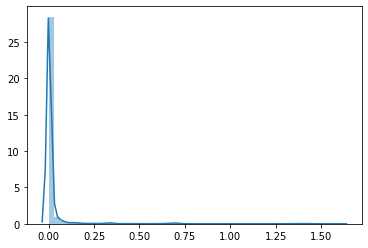

In [42]:
_cost=[]
for cost in cost_path:
    _cost.extend(np.load(cost).tolist())
sns.distplot(_cost)

In [73]:
_curve=[]
for curve in curve_path:
    _curve.append(np.load(curve)[:,:720])
_cost=[]
for cost in cost_path:
    np_cost=np.load(cost)
    scalar=MinMaxScaler()
    np_cost=scalar.fit_transform(np_cost.reshape(-1,1)).squeeze()
    _cost.append(np_cost)


In [75]:
_cost

[array([0.09544787, 0.06389856, 0.04321121, ..., 0.00438879, 0.00164235,
        0.00127118]),
 array([0.01361621, 0.01052629, 0.00921783, ..., 0.05646181, 0.06795037,
        0.00588032]),
 array([0.12876597, 0.08531973, 0.0580525 , ..., 0.09782158, 0.08377529,
        0.00085798]),
 array([0.03309823, 0.02099939, 0.02018251, ..., 0.14041237, 0.22756087,
        0.00382805]),
 array([0.12906215, 0.05851858, 0.03894206, ..., 0.08412262, 0.00097232,
        0.00159913]),
 array([0.0781213 , 0.04459069, 0.13069085, ..., 0.00821821, 0.00508667,
        0.00362055]),
 array([0.12196456, 0.07924907, 0.05344903, ..., 0.00126755, 0.00364969,
        0.00382647]),
 array([0.12987819, 0.08769344, 0.06021086, ..., 0.00463798, 0.12237576,
        0.22120904]),
 array([0.05901074, 0.08350391, 0.05817076, ..., 0.2612511 , 0.42030595,
        0.00740528]),
 array([0.03569743, 0.07454317, 0.0328703 , ..., 0.00473228, 0.07979818,
        0.00482   ]),
 array([0.04358038, 0.02854763, 0.01300958, ..., 0

In [118]:
shot=3
way=4
flag=True

while flag:
    ways=np.random.randint(0,len(_cost),way)
    candidate_cost=np.take(_cost,ways)
    candidate_curve=np.take(_curve,ways)
    if min(map(lambda x:len(x),candidate_cost))>shot:
        flag=False
    _data=[]
    _label=[]
    for curve,cost in zip(candidate_curve,candidate_cost):
        shots=np.random.randint(0,len(curve),shot)
        _data.append(np.take(curve,shots,axis=0))
        _label.append(np.take(cost,shots,axis=0))
    _data=np.stack(_data)
    _label=np.stack(_label)
#         break
    


In [117]:
shots=np.random.randint(0,len(curve),shot)
np.take(curve,shots,axis=0).shape

(3, 720)

In [121]:
np.vstack(_data).shape

(12, 720)

In [88]:
_data

array([ 29,  85, 168,  19])

In [100]:
temp=np.take(_cost,[0,1,2])

In [99]:
len(temp[0])
min(map(lambda x:len(x),temp))

1219

In [109]:
candidate_cost

array([array([0.01615389, 0.05000532, 0.02271829, ..., 0.00099123, 0.00033636,
       0.00117245]),
       array([0.69571355, 0.72334286, 0.85819847, 0.76820113, 0.43677929,
       0.44475028, 0.40594222, 0.24240367, 0.20853598, 0.16613612,
       0.26590404, 0.20347733, 0.2306925 , 0.08483236, 0.10288939,
       0.10566189, 0.0787028 , 0.09190849, 0.06688595, 0.07705159,
       0.06064353, 0.05541176, 0.05685229, 0.06529861, 0.0830051 ,
       0.06959349, 0.04526592, 0.03879977, 0.03015583, 0.02979609,
       0.03711616, 0.0620045 , 0.49577071, 0.47362047, 0.48966945,
       0.48842587, 0.52294067, 0.41087807, 0.4153038 , 0.42833324,
       0.33984139, 0.35386795, 0.36262657, 0.33378714, 0.31074004,
       0.20115182, 0.23425755, 0.22100487, 0.11734562, 0.18880187,
       0.10572551, 0.13807779, 0.13021471, 0.01443848, 0.01768809,
       0.09210095, 0.1101935 , 0.1029402 , 0.08107126, 0.06955794,
       0.07645036, 0.27032551, 0.27923226, 0.28176574, 0.37711271,
       0.4551266 , 0.2

In [107]:
min(map(lambda x:len(x),candidate_cost))

2

In [2]:
import os,glob

In [3]:
path = [i for i in glob.glob('dataset/*/*/*') if os.path.isdir(i)]

In [4]:
cost_path = list(map(lambda x: os.path.join(x, 'cost.npy'), path))
curve_path = list(map(lambda x: os.path.join(x, 'curve.npy'), path))
_curve = []
for curve in curve_path:
    _curve.append(np.load(curve)[:, :720])
_cost = []
for cost in cost_path:
    np_cost = np.load(cost)
    _cost.append(np_cost)

In [5]:
flag = True
while flag:
    ways = np.random.randint(0, len(_cost), 5)
    candidate_cost = np.take(_cost, ways)
    candidate_curve = np.take(_curve, ways)

    if min(map(lambda x: len(x), candidate_cost)) > max(3, 3):
        flag = False
        # shot 크기 보다 작은 way를 선택하지 않음
    train_data = []
    train_label = []

    test_data = []
    test_label = []

    for curve, cost in zip(candidate_curve, candidate_cost):
        # shot 에 맞춰서 배치에 넣음
        train_shots = np.random.randint(0, len(curve), 3)
        train_data.append(np.take(curve, train_shots, axis=0))
        train_label.append(np.take(cost, train_shots, axis=0))

        test_shots = np.random.randint(0, len(curve), 3)
        test_data.append(np.take(curve, test_shots, axis=0))
        test_label.append(np.take(cost, test_shots, axis=0))

#     train_data = torch.tensor(np.stack(train_data), dtype=torch.float32)
#     train_label = torch.tensor(np.stack(train_label), dtype=torch.float32)

#     test_data = torch.tensor(np.stack(test_data), dtype=torch.float32)
#     test_label = torch.tensor(np.stack(test_label), dtype=torch.float32)

In [14]:
np.stack(train_label).shape

(5, 3)

In [20]:
np.stack(train_label)

array([[3.73711485e-03, 3.56063000e-05, 1.37834680e-03],
       [1.88834507e-02, 2.83094696e-02, 3.81656477e-02],
       [1.74043250e-04, 1.88640750e-04, 2.46924350e-04],
       [5.89883000e-05, 9.68785500e-05, 4.22301500e-05],
       [1.39861190e-03, 5.99008150e-04, 1.37055294e-02]])

In [ ]:
t.

In [31]:
from sklearn import preprocessing
_scaler=preprocessing.Normalizer()
_scaler.fit_transform(np.stack(train_label).T).T

array([[0.19361974, 0.00125743, 0.03396942],
       [0.97835066, 0.99974739, 0.94059403],
       [0.00901717, 0.00666184, 0.00608546],
       [0.00305618, 0.00342126, 0.00104076],
       [0.07246201, 0.02115394, 0.33777336]])

In [39]:
_scaler=preprocessing.RobustScaler()
_scaler.fit_transform(np.stack(train_label))

array([[ 0.65631658, -0.30477082,  0.        ],
       [ 4.90723758, 56.00312907,  2.73336656],
       [-0.34368342,  0.        , -0.08406684],
       [-0.37597437, -0.18274605, -0.09927601],
       [ 0.        ,  0.81725395,  0.91593316]])

In [26]:
train_label.shape

[array([3.73711485e-03, 3.56063000e-05, 1.37834680e-03]),
 array([0.01888345, 0.02830947, 0.03816565]),
 array([0.00017404, 0.00018864, 0.00024692]),
 array([5.898830e-05, 9.687855e-05, 4.223015e-05]),
 array([0.00139861, 0.00059901, 0.01370553])]